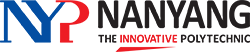

# ITB251 Assignment - Task 1: Sentiment Classification

You are required to build a sentiment classification model predict the sentiment of the review text. Businesses will be able to use this model to predict the sentiment of a new review.

Complete the following sub-tasks:
1.	**Data Understanding**: Examine the dataset
2.	**Data Preparation**: Prepares the data and all necessary pre-processing tasks
3.	**Modelling**: Use different text representation and modelling algorithms
4.	**Evaluation**: Evaluates results from the algorithms and select the best model

For each sub-task, perform the necessary steps and **explain the rationale taken for each step in this Jupyter notebook**. 

**Done by: \<Zowie Ong 212345X\>**

## Import libraries and download the packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk import FreqDist

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zoe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zoe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Read the dataset

In [2]:
df = pd.read_csv('shopping_reviews.csv',index_col=[0])

# reset index
df.index = range(len(df.index))


df.head()

,review_id,date,name,categories,text,stars
0,Af6Jnf8F5xBliuixStWF8g,2019-09-20,"""Soccer Zone""",Shopping;Sporting Goods,I'll admit it. I caught World Cup fever in 20...,4
1,j-6-I55-9EiKNGAjoLHx9A,2020-06-30,"""Fye""",Shopping;Books;Mags;Music & Video;Music & DVDs,This store has gone through some management ch...,4
2,wCwl4NC1CxkRIAg2RcLzig,2020-09-28,"""By Design""",Home & Garden;Furniture Stores;Shopping,By Design sells funky ultra modern furniture. ...,3
3,PwSZrByRWrZ5x7QTq7V2PA,2020-05-10,"""Star Nursery""",Nurseries & Gardening;Home & Garden;Shopping,"I don't have much of a greenthumb, thankfully ...",4
4,yHmRAHgjgqucJcUG3to7-Q,2020-08-26,"""Sports Authority""",Sporting Goods;Shopping,I am only ever going to this Sports Authority ...,5


## Data Understanding



#### How many rows are in  the dataset?

In [3]:
print('There are' , len(df), 'reviews')

There are 36422 reviews


#### How many different names are in the dataset? 

In [4]:
df['name'].nunique()

7475

#### Distribution of reviews over months and years 

In [5]:
from datetime import datetime

date_str = df['date']
df['year']=''
df['month']=''

for index, date in enumerate(date_str):
    date_obj = datetime.strptime(date, '%Y-%m-%d').date()
    df['date'][index] = date_obj
    df['year'][index]=date_obj.strftime('%Y')
    df['month'][index]=date_obj.strftime('%B')

print(type(df['date'][0]))
print(df['date'][0])  # printed in default format

C:\Users\zoe\AppData\Local\Temp/ipykernel_1820/3672976536.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'][index] = date_obj
C:\Users\zoe\AppData\Local\Temp/ipykernel_1820/3672976536.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'][index]=date_obj.strftime('%Y')
C:\Users\zoe\AppData\Local\Temp/ipykernel_1820/3672976536.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'][index]=date_obj.strftime

<class 'datetime.date'>
2019-09-20


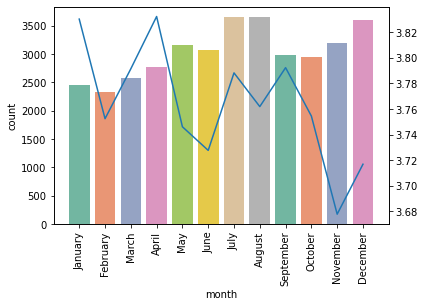

In [6]:
# sort by months

import calendar
df['month'] = pd.Categorical(df.month, categories=calendar.month_name[1:], ordered=True)

df.sort_values('month', inplace=True)


import seaborn as sns
import matplotlib.pyplot as plt

color = sns.color_palette('Set2')
plt.xticks(rotation=90)
ax = sns.countplot(x='month', data=df, palette = color)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), df['stars'].groupby(by=df['month']).mean())

plt.show()

April has the highest average stars, November has the lowest average stars.
Both months do not have a big difference in number of reviews, but November could have a significantly higher count of negative reviews. This would cause the average stars for November to plummet as compared to other months with similar review count.

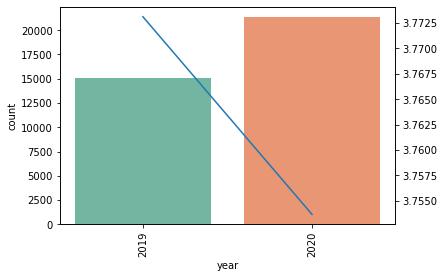

In [7]:
# sort by year

df.sort_values('year', inplace=True)

color = sns.color_palette('Set2')
plt.xticks(rotation=90)
ax = sns.countplot(x='year', data=df, palette = color)
ax2 = ax.twinx()
# ax2 = sns.lineplot(x="year", y="rating", data=df)
ax2.plot(ax.get_xticks(), df['stars'].groupby(by=df['year']).mean())

plt.show()

2020 has about 5000 more reviews than 2019, but their average stars are about the same. 2019 average stars is 3.7725, while 2020 average stars is 3.7550. This shows that there is a similar distribution of stars in both years.

#### This step is done to visualize and hence, have a better understanding of the distribution of star rating given for the reviews.

5    12611
4    11984
3     5692
1     3328
2     2807
Name: stars, dtype: int64


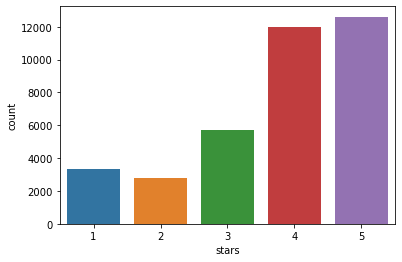

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df['stars'].value_counts())

sns.countplot(x='stars', data=df)
plt.show()

#### What are the top most occuring words?

In [9]:

from nltk.tokenize import word_tokenize

# extract text
all_words = [word.lower() for sent in df.text for word in word_tokenize(sent)]


# frequency distribution on text
all_words_frequency = FreqDist(all_words)
print (all_words_frequency)

# print 10 most frequently occurring words
print (all_words_frequency.most_common(10))


<FreqDist with 87146 samples and 5508556 outcomes>
[('.', 251452), ('the', 204206), (',', 193559), ('i', 160000), ('and', 145600), ('a', 128521), ('to', 126081), ('of', 83743), ('it', 66045), ('in', 65280)]


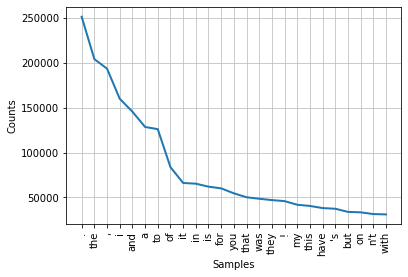

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [10]:
# plot the frequency distribution of the top 25 words
all_words_frequency.plot(25, cumulative=False)

The frequency distribution shows us that the top 25 most frequent words are mostly stopwords and punctuation. 

## Data Preparation
- remove unnecessary columns
- remove duplicate rows
- drop 3 star reviews and assign sentiment to each review


clean the text data
- remove stopwords, words with 2 characters or lesser, punctuation and perform stemming



#### remove the columns that will not help in the sentiment analysis.

In [11]:
# drop unnecessary columns

df.drop(columns=['date', 'name', 'categories'], inplace=True)
df.head()

,review_id,text,stars,year,month
22809,4GbV-HJzUnWlrMw2TPteFg,"Nothing wrong with tanned, blonde beach-men is...",4,2019,July
35253,Pkz1T4Zy6tkzEPGnFzmNBw,I remember growing up and always seeing a 1 or...,5,2019,October
1576,CbuK3LQwbL7j8ExDUWlWPw,Spacious mall. You could easily spend a few ho...,3,2019,October
6748,RimI3qdCjJ6lYHpTLXuqZA,"Wheeeeee this store is a great gift store, won...",4,2019,October
10172,XWx8V6fIu7LU5jw2PEp6Wg,Gotta give a big THANKS! to this Walgreens. I...,5,2019,October


#### remove duplicated rows to avoid biased analysis 

In [12]:
# remove duplicate rows

df.drop_duplicates(inplace=True)
len(df)

36422

#### remove 3 star reviews as they are considered 'neutral' and is not useful for the sentiment analysis.
Reviews rated as 3 stars may not be accurate as the text could be leaning more towards positive or negative instead. 

Hence an accurate categorization of 3 star reviews into 'positive' or 'negative' would require me to read and assign each review a sentiment based on my judgment.
This would be too time consuming and inefficient. Hence I removed the 3 star reviews to avoid inaccurate categorization / prediction of such reviews.

In [13]:
# drop rows with 3 star reviews

print(df.shape)

df = df.loc[df["stars"] != 3 ]

# reset index
df.index = range(len(df.index))
df.shape

(36422, 5)


(30730, 5)

#### replace 'stars' column with 'sentiment' column for model to predict a binary outcome.

In [14]:
# create new column 'sentiment'

df['sentiment'] = ''
stars = list(df['stars'])

for i, item in enumerate(stars):
    if item ==1 or item ==2:
        df['sentiment'][i] = 'negative'
    else:
        df['sentiment'][i] = 'positive'

# print(i)
df = df.drop(columns=['stars'])
df.tail()

C:\Users\zoe\AppData\Local\Temp/ipykernel_1820/2327094638.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'][i] = 'positive'
C:\Users\zoe\AppData\Local\Temp/ipykernel_1820/2327094638.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'][i] = 'negative'


,review_id,text,year,month,sentiment
30725,xSupwSaR7vrUuW1zjF3Now,The place to go when you need any electronics ...,2020,June,positive
30726,x3Az2-C7L-xNZf5M2dDQYg,I used the car stereo installation service. F...,2020,June,negative
30727,ZReFYiWGfwxfQ1xAYmvnVw,This is the place to go when meeting up with f...,2020,June,positive
30728,dwrUse1u6CRCVfP8Y5oJtw,Came in to buy a mac book pro. I've done a lot...,2020,June,negative
30729,Hah1cKEWEecbphLzglMJ-g,The staff were condescending and outright rude...,2020,June,negative


#### Visualize the distribution of sentiments

number of positive reviews is 24595 
number of negative reviews is 6135


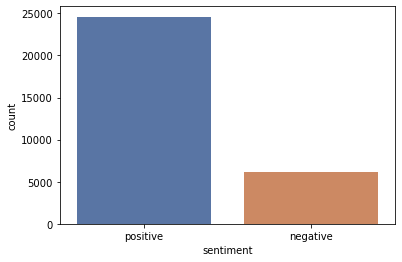

In [15]:
# count sentiment column

sentcol = list(df['sentiment'])
positive = sentcol.count('positive')
negative = sentcol.count('negative')

print('number of positive reviews is', positive, '\nnumber of negative reviews is', negative)


# Plotting the Sentiment distribution
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette("deep")
sns.countplot(x='sentiment', data=df, palette=color)
plt.show()

#### Clean the text data

#### This is done to reduce dimensionality, by removing stopwords and punctuation and stemming words. 
Also done to reduce noise in the dataset. Words that would not help in the categorization or do not carry much meaning such as punctuation, filler words (on, to, of), are removed.

In [16]:
# pip install gensim

In [17]:

import string
import gensim
from nltk.corpus import stopwords
from gensim.parsing.porter import PorterStemmer

porter_stemmer = PorterStemmer()
stopwords_english = stopwords.words('english')


# function to remove Punctuation and Stopwords, perform stemming
def clean(doc):
    all_words_clean = []
    for word in doc:
        if word not in stopwords_english and not word.isdigit() and len(word)>2:
            punc_free = ''.join([ch for ch in word if ch not in string.punctuation])
            if punc_free and not word.isdigit():
                all_words_clean.append(porter_stemmer.stem(punc_free))

    return all_words_clean

all_words_clean = clean(all_words)

# print the first 10 words
print (all_words_clean[:10])


['noth', 'wrong', 'tan', 'blond', 'beachmen', 'aahhh', 'on', 'place', 'would', 'love']


In [18]:
import re

df['cl_text'] = ''

# remove number / words with numbers
df['cl_text'] = [re.sub(r"\w*\d\w*\d*\w*",'',s).strip() for s in df['text']]

# word tokenize text
df['cl_text'] = df['cl_text'].apply(lambda x: word_tokenize(x.lower()))

# apply function to text in dataframe; remove words with 2 characters or less, digits, 
# Punctuation and Stopwords, perform stemming
text = df['cl_text']
doc_clean = [clean(doc) for doc in text]

df['cl_text'] = doc_clean
df.head()

,review_id,text,year,month,sentiment,cl_text
0,4GbV-HJzUnWlrMw2TPteFg,"Nothing wrong with tanned, blonde beach-men is...",2019,July,positive,"[noth, wrong, tan, blond, beachmen, aahhh, on,..."
1,Pkz1T4Zy6tkzEPGnFzmNBw,I remember growing up and always seeing a 1 or...,2019,October,positive,"[rememb, grow, alwai, see, box, see, end, tabl..."
2,RimI3qdCjJ6lYHpTLXuqZA,"Wheeeeee this store is a great gift store, won...",2019,October,positive,"[wheeeeee, store, great, gift, store, wonder, ..."
3,XWx8V6fIu7LU5jw2PEp6Wg,Gotta give a big THANKS! to this Walgreens. I...,2019,October,positive,"[got, give, big, thank, walgreen, found, shoel..."
4,zPyvxdok-7JyeWyqJKUGmg,"I really love Fresh and Easy, the name says it...",2019,October,positive,"[realli, love, fresh, easi, name, sai, fresh, ..."


#### The frequency distribution helps us visualize the top terms and the count of the top few terms in comparison to other terms in the corpus. 

<FreqDist with 61147 samples and 2399316 outcomes>
[('nt', 31375), ('store', 29014), ('like', 19860), ('place', 18462), ('get', 18095), ('on', 18049), ('shop', 17693), ('time', 14794), ('great', 14389), ('look', 14141)]


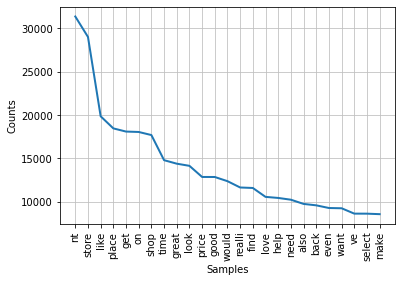

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [19]:
# frequency distribution on cleaned text

all_words_frequency = FreqDist(all_words_clean)
print (all_words_frequency)

# print 10 most frequently occurring words
print (all_words_frequency.most_common(10))

# plot the frequency distribution of the top 25 words
all_words_frequency.plot(25, cumulative=False)

Before cleaning the data, there were 87146 samples and 5508556 outcomes, and the most common words were stopwords and punctuation.
After cleaning the data, there are 61147 samples and 2399316 outcomes, and there are more meaningful words in the most common words.

It is evident that more than 20,000 stopwords and punctuation were removed from the text.
This allows for better analysis of meaningful words after removing noise from the dataset.

# Modelling

- Two feature sets will be created, a document-term matrix with term occurence, and a document-term matrix with TF-IDF.
    - TF-IDF is used as it considers the term weight with respect to the entire document, so it gives a more relative value of the term as compared to using term occurence.


- Logistic regression and decision tree models will be used on both feature sets.
    - Both models are used for predicting categorical variables.


#### 1. create feature set using top 2000 terms based on term occurence.
This is to reduce dimensionality of the dataset for the model.

In [20]:
# top 2000 words using term occurence

print ('The number of rows in the word:word frequency distribution is ', len(all_words_frequency)) 

# get 2000 frequently occuring words
most_common_words = all_words_frequency.most_common(2000)

# print the first 10 most frequently occuring words
print ('Top 10 frequently occuring words \n', most_common_words[:10], '\n')

# print the last 10 most frequently occuring words
print ('Bottom 10 frequently occuring words \n', most_common_words[-10:], '\n')

# the most common words list's elements are in the form of tuple get 
# only the first element of each tuple of the word list
word_features = [item[0] for item in most_common_words]
print(word_features[:10])

The number of rows in the word:word frequency distribution is  61147
Top 10 frequently occuring words 
 [('nt', 31375), ('store', 29014), ('like', 19860), ('place', 18462), ('get', 18095), ('on', 18049), ('shop', 17693), ('time', 14794), ('great', 14389), ('look', 14141)] 

Bottom 10 frequently occuring words 
 [('gucci', 152), ('lobbi', 152), ('action', 152), ('fiction', 151), ('ti', 151), ('obsess', 151), ('speed', 151), ('resid', 151), ('bob', 151), ('omg', 151)] 

['nt', 'store', 'like', 'place', 'get', 'on', 'shop', 'time', 'great', 'look']


In [21]:
# create feature set

def document_features(df, stemmed_tokens):
    doc_features = []
    for index, row in df.iterrows():
        features = {}
        for word in word_features:
            # get term occurence: true if it's in the word_features, false if it's not
            features[word] = (word in row[stemmed_tokens])
        doc_features.append(features)
    return doc_features

feature_set = pd.DataFrame(document_features(df, 'text'), index = df.index)
feature_set.head()

,nt,store,like,place,get,on,shop,time,great,look,...,gucci,lobbi,action,fiction,ti,obsess,speed,resid,bob,omg
0,True,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,True,False,True,False,True,...,False,False,False,False,True,False,False,False,False,False
2,True,True,True,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,True,False,False,False,True,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


#### split term occuerence feature set

positive    19676
negative     4908
Name: sentiment, dtype: int64


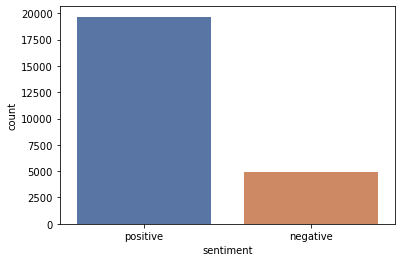

In [22]:
# split dataset into training and test dataset
from sklearn.model_selection import train_test_split

# use x to predict y
X = feature_set
y = df['sentiment']

# test_size=0.2 means split testing 20:training 80 
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(y1_train.value_counts())

# Plotting the Sentiment distribution
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette("deep")
sns.countplot(x=y1_train, palette=color)
plt.show()



#### 2. bag of words with TF-IDF

#### split TF-IDF feature set

positive    19676
negative     4908
Name: sentiment, dtype: int64


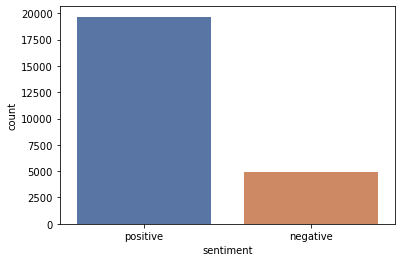

In [23]:
X = df['text']
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(y2_train.value_counts())

# Plotting the Sentiment distribution
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette("deep")
sns.countplot(x=y2_train, palette=color)
plt.show()

In [24]:
X2_train[:10]

C:\Users\zoe\AppData\Local\Temp/ipykernel_1820/2303099486.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  X2_train[:10]


24203    I've been struggling for a while with how to r...
4437     Cute, chic and fun!\n\nThe selection is ecclec...
7918     I just moved to the area and fell in love with...
6482     I love these sort of little dusty antique shop...
13407    This Indigo's location at Yorkville is the hap...
22826    I hate 1 star reviews, but this place really e...
29722    You wan customer service? They go above and be...
6260     For guitarists, Live Music can be summed up in...
23889    I am not sure why the review of this disappear...
30499    Crystals is a super high-end mall in the Las V...
Name: text, dtype: object

### Create TF-IDF matrix

remove numbers, words with numbers, and words with 2 characters or lesser

In [25]:
# Use TfidfVectorizer() to generate TF-IDF matrix for reviews
from sklearn.feature_extraction.text import TfidfVectorizer

# create document term matrix with TF-IDF
tfid = TfidfVectorizer(stop_words='english', ngram_range=(1,1), max_features=10000)



x_train_tfidf = tfid.fit_transform(X2_train).toarray()
x_test_tfidf = tfid.transform(X2_test).toarray()


x_train_dftfidf = pd.DataFrame(x_train_tfidf, columns = tfid.get_feature_names())
x_test_dftfidf = pd.DataFrame(x_test_tfidf, columns = tfid.get_feature_names())
x_test_dftfidf.head()

,00,000,00pm,02,05,09,10,100,1000,100th,...,zwei,zwischen,ça,également,était,été,êtes,être,über,übersichtlich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.088365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078842,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


Remove terms that are numbers, contain numbers, or are 2 characters or lesser.

In [26]:
goodcols = []
for i in x_train_dftfidf:
    if len(i) > 2 and not any(c.isdigit() for c in i):
        goodcols.append(i)

In [27]:
x_train_goodtfidf = x_train_dftfidf[goodcols]
x_test_goodtfidf = x_test_dftfidf[goodcols]
x_test_goodtfidf.head()

,aaa,aaron,aback,abandoned,abc,abend,aber,abercrombie,abilities,ability,...,zwar,zwei,zwischen,également,était,été,êtes,être,über,übersichtlich
0,0.0,0.0,0.0,0.0,0.0,0.101903,0.0,0.0,0.0,0.0,...,0.0,0.088365,0.0,0.0,0.0,0.0,0.0,0.0,0.078842,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


#### create feature set using TF-IDF more than 0.100 

In [28]:
def tfidf2000_features(df, stemmed_tokens):
    tfidf_features_list = []
    for index, row in df.iterrows():
        features = []
        for word in row:
            if word>0.10:
            # get tfidf value: true if it's more than 0.100, false if it's not
                features.append(True)
            else:
                features.append(False)
        tfidf_features_list.append(features)
    return tfidf_features_list

x_train_goodtfidf = pd.DataFrame(tfidf2000_features(x_train_goodtfidf, 'text'), columns=x_train_goodtfidf.columns,index = x_train_goodtfidf.index)
x_test_goodtfidf = pd.DataFrame(tfidf2000_features(x_test_goodtfidf, 'text'), columns=x_test_goodtfidf.columns,index = x_test_goodtfidf.index)
x_train_goodtfidf.head()

,aaa,aaron,aback,abandoned,abc,abend,aber,abercrombie,abilities,ability,...,zwar,zwei,zwischen,également,était,été,êtes,être,über,übersichtlich
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Fit and predict models
- done on top 2 performing models

In [29]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [30]:
# We will iterate through all the models to see which model gives us the highest accuracy after testing.

models = []
models.append(('SVM', SVC(gamma='auto')))
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('RF', RandomForestClassifier(n_estimators=10)))
models.append(('GB', GradientBoostingClassifier()))

In [31]:

names=[]
scores=[]
for name, model in models:
    model.fit(X1_train, y1_train)
    y_pred = model.predict(X1_test)
    print('pred')
    
    scores.append(accuracy_score(y1_test, y_pred))
    names.append(name)
    
models_comparison = pd.DataFrame({'Name': names, 'Score':scores})

# sort models by descending to see the model with highest score
models_comparison.sort_values(by='Score', ascending=False)

pred
pred
pred
pred


,Name,Score
1,LR,0.894403
3,GB,0.864790
0,SVM,0.849170
2,RF,0.838432


Best performing models on the term occurence feature set are the logistic regression model and the Gradient boosting classifier.
Hence, the following models will be evaluated to find the best performing model and feature set.
- Gradient boosting classifier with term occurence
- Logistic regression with term occurence
- Gradient boosting classifier with TF-IDF
- Logistic regression with TF-IDF

####  Gradient boosting classifier with term occurence

In [32]:
# import model that is used
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


classifier = GradientBoostingClassifier(random_state=42)
classifier.fit(X1_train, y1_train)


y1_pred_gb = classifier.predict(X1_test)

print(list(y1_test[:10]))
print(list(y1_pred_gb[:10]))


['negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive']
['positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive']


C:\Users\zoe\AppData\Local\Temp/ipykernel_1820/3538761616.py:12: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(list(y1_test[:10]))


#### logistic regression with term occurence

In [33]:
# import model that is used

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs')

lr.fit(X1_train, y1_train)
y1_pred_lr = lr.predict(X1_test)

print(list(y1_test[:10]))
print(list(y1_pred_lr[:10]))




['negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive']
['negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive']


C:\Users\zoe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\zoe\AppData\Local\Temp/ipykernel_1820/1460050658.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(list(y1_test[:10]))


#### Gradient boosting classifier with TF-IDF

In [34]:

classifier.fit(x_train_goodtfidf, y2_train)

y2_pred_gb = classifier.predict(x_test_goodtfidf)

print(list(y2_test[:10]))
print(list(y2_pred_gb[:10]))

['negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive']
['positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive']


C:\Users\zoe\AppData\Local\Temp/ipykernel_1820/485465682.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(list(y2_test[:10]))


#### logistic regression model with TF-IDF

In [35]:

lr.fit(x_train_goodtfidf, y2_train)

y2_pred_lr = lr.predict(x_test_goodtfidf)

print(list(y2_test[:10]))
print(list(y2_pred_lr[:10]))

['negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive']
['positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive']


C:\Users\zoe\AppData\Local\Temp/ipykernel_1820/3067983572.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(list(y2_test[:10]))


## Evaluation
The accuracy score and confusion matrix for each model will be displayed.
- This allows for a summarized metric to measure the model's performance, and a better visualization of the predictions made  by the model.



#### create a function to display confusion matrix

In [36]:
allmodels = []

# Function to create a confusion matrix 
def conf_matrix(y_test, pred_test):    

    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))

    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

#### evaluate Gradient boosting classifier with term occurence

              precision    recall  f1-score   support

    negative       0.87      0.38      0.53      1227
    positive       0.86      0.99      0.92      4919

    accuracy                           0.86      6146
   macro avg       0.87      0.68      0.72      6146
weighted avg       0.87      0.86      0.84      6146

Accuracy Score: 0.8647901073869183


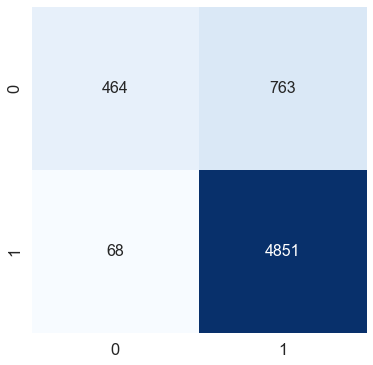

In [37]:
# classification report
print(classification_report(y1_test, y1_pred_gb))

thisscore = []

# f1_score
f1score = f1_score(y1_test, y1_pred_gb, average=None)
thisscore.extend(f1score)

# accuracy score
accuracy = accuracy_score(y1_test, y1_pred_gb)
thisscore.append(accuracy)
print("Accuracy Score: " + str(accuracy))

allmodels.append(thisscore)

#Ploting the confusion matrix
conf_matrix(y1_test, y1_pred_gb)

#### ! evaluate logistic regression model with term occurence !

              precision    recall  f1-score   support

    negative       0.77      0.67      0.72      1227
    positive       0.92      0.95      0.94      4919

    accuracy                           0.89      6146
   macro avg       0.85      0.81      0.83      6146
weighted avg       0.89      0.89      0.89      6146

Accuracy Score: 0.8948909860071591


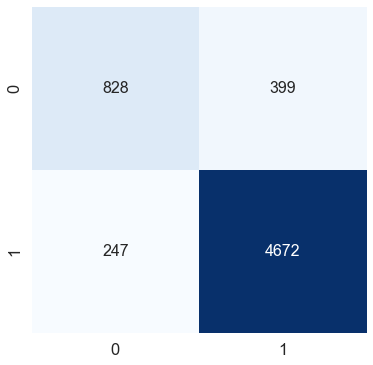

In [38]:
# classification report
print(classification_report(y1_test, y1_pred_lr))

thisscore = []

# f1_score
f1score = f1_score(y1_test, y1_pred_lr, average=None)
thisscore.extend(f1score)

# accuracy score
accuracy = accuracy_score(y1_test, y1_pred_lr)
thisscore.append(accuracy)
print("Accuracy Score: " + str(accuracy))

allmodels.append(thisscore)

#Ploting the confusion matrix
conf_matrix(y1_test, y1_pred_lr)

#### evaluate Gradient boosting classifier with TF-IDF

              precision    recall  f1-score   support

    negative       0.88      0.24      0.37      1227
    positive       0.84      0.99      0.91      4919

    accuracy                           0.84      6146
   macro avg       0.86      0.61      0.64      6146
weighted avg       0.85      0.84      0.80      6146

Accuracy Score: 0.8408721119427269


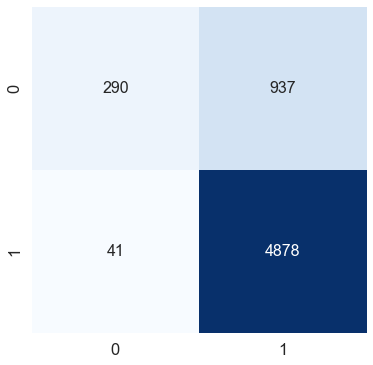

In [39]:
# classification report
print(classification_report(y2_test, y2_pred_gb))

thisscore = []

# f1_score
f1score = f1_score(y2_test, y2_pred_gb, average=None)
thisscore.extend(f1score)

# accuracy score
accuracy = accuracy_score(y2_test, y2_pred_gb)
thisscore.append(accuracy)
print("Accuracy Score: " + str(accuracy))

allmodels.append(thisscore)

#Ploting the confusion matrix
conf_matrix(y2_test, y2_pred_gb)

#### evaluate logistic regression model with TF-IDF

              precision    recall  f1-score   support

    negative       0.77      0.66      0.71      1227
    positive       0.92      0.95      0.93      4919

    accuracy                           0.89      6146
   macro avg       0.84      0.80      0.82      6146
weighted avg       0.89      0.89      0.89      6146

Accuracy Score: 0.8914741295151318


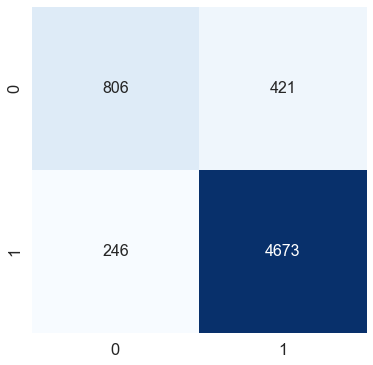

In [40]:
# classification report
print(classification_report(y2_test, y2_pred_lr))

thisscore = []

# f1_score
f1score = f1_score(y2_test, y2_pred_lr, average=None)
thisscore.extend(f1score)

# accuracy score
accuracy = accuracy_score(y2_test, y2_pred_lr)
thisscore.append(accuracy)
print("Accuracy Score: " + str(accuracy))

allmodels.append(thisscore)

#Ploting the confusion matrix
conf_matrix(y2_test, y2_pred_lr)

In [41]:
modelnames = ['GB with term occurence', 'Logistic regression with term occurence', 
              'GB with TF-IDF', 'Logistic regression with TF-IDF']
modelscores = ['Negative f1 score' ,'Positive f1 score' , 'Accuracy']


modeldf = pd.DataFrame(allmodels, index=modelnames, columns=modelscores)
modeldf.sort_values(by='Accuracy', ascending=False)

,Negative f1 score,Positive f1 score,Accuracy
Logistic regression with term occurence,0.719374,0.935335,0.894891
Logistic regression with TF-IDF,0.707328,0.933387,0.891474
GB with term occurence,0.527572,0.921105,0.864790
GB with TF-IDF,0.372272,0.908888,0.840872


# sample data for a balanced dataset

In [42]:
dfpos = df[df['sentiment']=='positive']
print(dfpos.shape)
dfneg = df[df['sentiment']=='negative']
print(dfneg.shape)

(24595, 6)
(6135, 6)


Create a subset at 9000 positive rows, so that the ratio of negative to positive data will be about 40:60.

In [43]:
dfpos = dfpos.iloc[:9000]
dfbalance = pd.concat([dfpos, dfneg])
dfbalance['sentiment'].value_counts()

positive    9000
negative    6135
Name: sentiment, dtype: int64

In [44]:
feature_set = pd.DataFrame(document_features(dfbalance, 'text'), index = dfbalance.index)
feature_set.head()

,nt,store,like,place,get,on,shop,time,great,look,...,gucci,lobbi,action,fiction,ti,obsess,speed,resid,bob,omg
0,True,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,True,False,True,False,True,...,False,False,False,False,True,False,False,False,False,False
2,True,True,True,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,True,False,False,False,True,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


positive    7200
negative    4908
Name: sentiment, dtype: int64


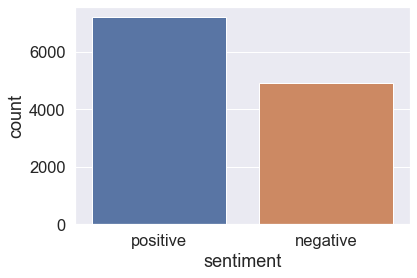

In [47]:
# split dataset into training and test dataset
from sklearn.model_selection import train_test_split

# use x to predict y
X = feature_set
y = dfbalance['sentiment']

# test_size=0.2 means split testing 20:training 80 
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(y1_train.value_counts())

# Plotting the Sentiment distribution

color = sns.color_palette("deep")
sns.countplot(x=y1_train, palette=color, order = ['positive', 'negative'])
plt.show()


C:\Users\zoe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.81      0.81      0.81      1227
    positive       0.87      0.87      0.87      1800

    accuracy                           0.84      3027
   macro avg       0.84      0.84      0.84      3027
weighted avg       0.84      0.84      0.84      3027

Accuracy Score: 0.8440700363396102


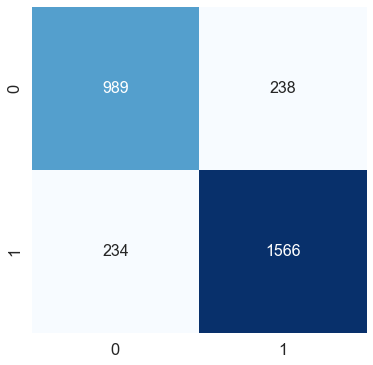

In [94]:
lr.fit(X1_train, y1_train)
y1_pred_lr = lr.predict(X1_test)

# classification report
print(classification_report(y1_test, y1_pred_lr))

thisscore = []

# f1_score
f1score = f1_score(y1_test, y1_pred_lr, average=None)
thisscore.extend(f1score)

# accuracy score
accuracy = accuracy_score(y1_test, y1_pred_lr)
thisscore.append(accuracy)
print("Accuracy Score: " + str(accuracy))

#Ploting the confusion matrix
conf_matrix(y1_test, y1_pred_lr)

In [96]:

modelscores = ['Negative f1 score' ,'Positive f1 score' , 'Accuracy']


# balancemodeldf = pd.DataFrame(thisscore, index=['Balanced dataset, logistic regression with term occurence'], columns=modelscores)
d = {'Negative f1 score': thisscore[0], 'Positive f1 score': thisscore[1], 'Accuracy': thisscore[2]}
balancemodeldf = pd.DataFrame(data=d, index=['Balanced dataset, logistic regression with term occurence'])

modeldf = modeldf.append(balancemodeldf)
modeldf.sort_values(by='Accuracy', ascending=False)

C:\Users\zoe\AppData\Local\Temp/ipykernel_20976/3588491777.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modeldf = modeldf.append(balancemodeldf)


,Negative f1 score,Positive f1 score,Accuracy
Logistic regression with term occurence,0.719374,0.935335,0.894891
Logistic regression with TF-IDF,0.707328,0.933387,0.891474
GB with term occurence,0.527572,0.921105,0.864790
"Balanced dataset, logistic regression with term occurence",0.807347,0.869034,0.844070
GB with TF-IDF,0.372272,0.908888,0.840872


After balancing the dataset where the ratio of negative to positive rows is 40:60, the model's accuracy score did not improve. 

However, the model has the highest negative f1 score. And although the positive f1-score is still higher, the model has the smallest difference between the negative and positive f1-score.
This proves that a more balanced dataset can produce a more balanced model. If there were more data for negative reviews, I believe that the model can be the best performing model.

### Conclusion

It is evident that the best model is logistic regression with term occurence as the feature set.
The model has the highest accuracy of 0.890 (3.s.f), and it has the highest precision, recall and f1-score out of the four models created.

                precision    recall  f1-score   support

    negative       0.77      0.67      0.72      1227
    positive       0.92      0.95      0.94      4919

All the models are better at predicting positives where the f1-score for positives is higher than the f1-score for negatives. 

In the models that uses the unbalanced dataset, both logistic regression models performed better than Gradient boosting classifiers. There is a large difference of 0.329 (3.s.f) , but only a small difference of 0.0241 (3.s.f) between the best and worst negative f1 score and positive f1-score respectively. 

Both of these points could be due to the fact that there are much more positive data than negative data. This leads to the models becoming more well-trained / bias in predicting positives. This also causes there to be a larger fluctuation in negative f1-score in different models, as there is not as much data as compared to positive data.

## Submission
Export your completed work as HTML. Select **File** > **Download as** > **HTML (.html)**.